In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [27]:
df = pd.read_csv('loan_dataset 2.csv')
df.columns = df.columns.str.strip() 
df=df.drop(columns=['loan_id'])

In [26]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [28]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [29]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [30]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [31]:
columns_to_winsorize = [
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]



In [32]:
def wisker(col):
    q1, q3 = np.percentile(col.dropna(), [25, 75])  
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

def count_outliers(col, lw, uw):
    return ((col < lw) | (col > uw)).sum()

for col in columns_to_winsorize:
    if col in df.columns:
        lw, uw = wisker(df[col])
        outliers_before = count_outliers(df[col], lw, uw)
        print(f"Column: {col}")
        print(f"  Lower whisker (lw): {lw}")
        print(f"  Upper whisker (uw): {uw}")
        print(f"  Outliers BEFORE winsorization: {outliers_before}")

        # Apply winsorization
        df[col] = np.where(df[col] < lw, lw, df[col])
        df[col] = np.where(df[col] > uw, uw, df[col])

        outliers_after = count_outliers(df[col], lw, uw)
        print(f"  Outliers AFTER winsorization: {outliers_after}\n")


Column: income_annum
  Lower whisker (lw): -4500000.0
  Upper whisker (uw): 14700000.0
  Outliers BEFORE winsorization: 0
  Outliers AFTER winsorization: 0

Column: loan_amount
  Lower whisker (lw): -13000000.0
  Upper whisker (uw): 42200000.0
  Outliers BEFORE winsorization: 0
  Outliers AFTER winsorization: 0

Column: loan_term
  Lower whisker (lw): -9.0
  Upper whisker (uw): 31.0
  Outliers BEFORE winsorization: 0
  Outliers AFTER winsorization: 0

Column: cibil_score
  Lower whisker (lw): 10.5
  Upper whisker (uw): 1190.5
  Outliers BEFORE winsorization: 0
  Outliers AFTER winsorization: 0

Column: residential_assets_value
  Lower whisker (lw): -11450000.0
  Upper whisker (uw): 24950000.0
  Outliers BEFORE winsorization: 52
  Outliers AFTER winsorization: 0

Column: commercial_assets_value
  Lower whisker (lw): -8150000.0
  Upper whisker (uw): 17050000.0
  Outliers BEFORE winsorization: 37
  Outliers AFTER winsorization: 0

Column: luxury_assets_value
  Lower whisker (lw): -1380000

In [33]:
# Count the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

no_of_dependents              6
education                     2
self_employed                 2
income_annum                 98
loan_amount                 378
loan_term                    10
cibil_score                 601
residential_assets_value    251
commercial_assets_value     172
luxury_assets_value         379
bank_asset_value            143
loan_status                   2
dtype: int64


In [34]:
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")
# there is no duplicates

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


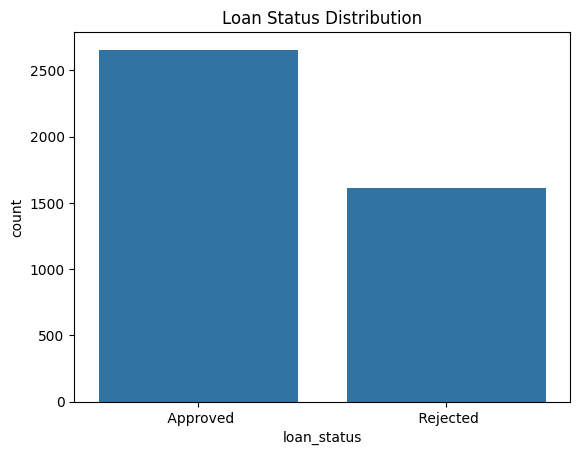

In [35]:
# Target distribution
sns.countplot(data=df, x='loan_status')
plt.title("Loan Status Distribution")
plt.show()

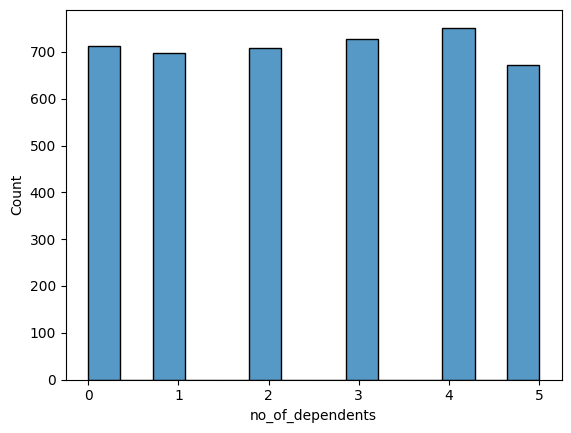

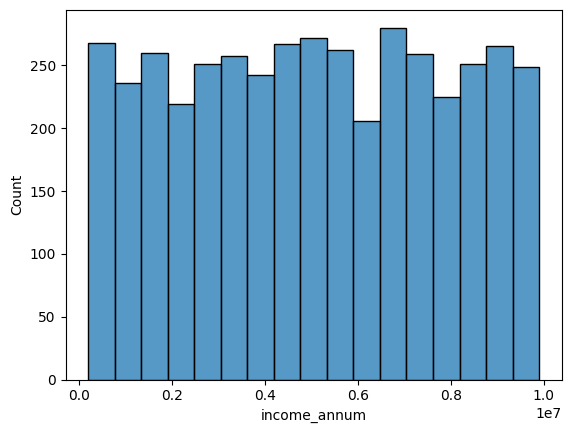

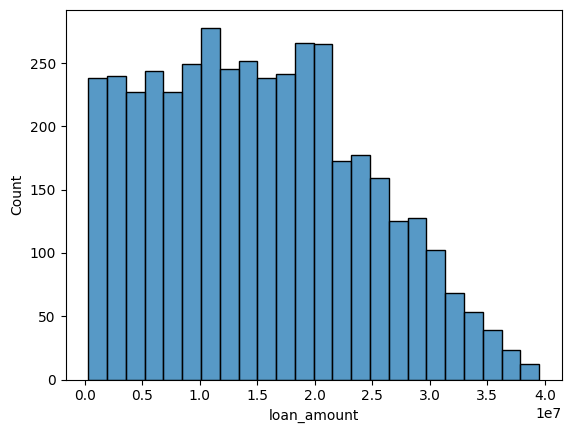

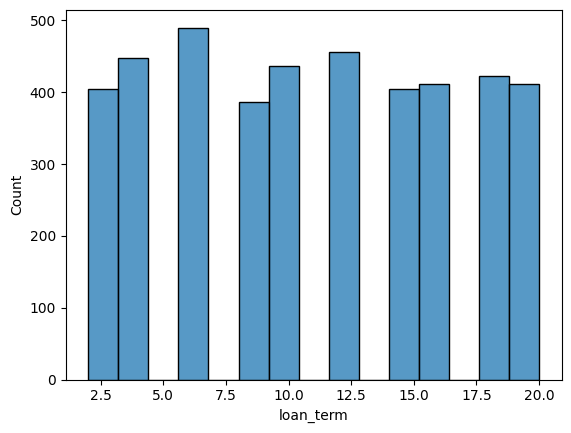

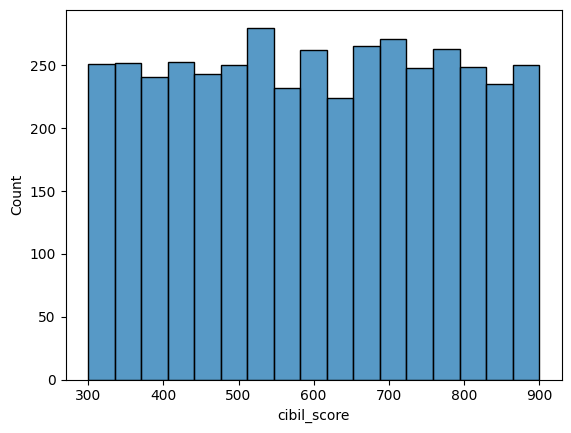

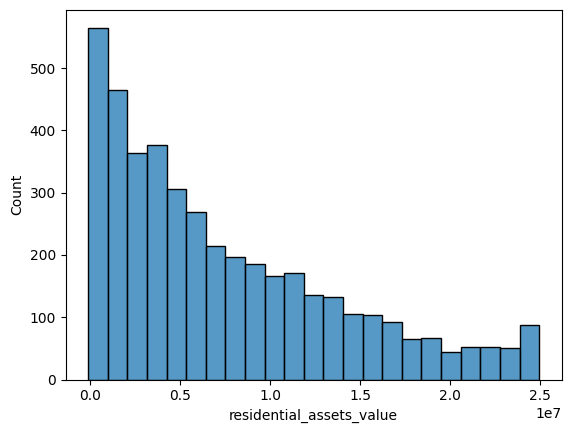

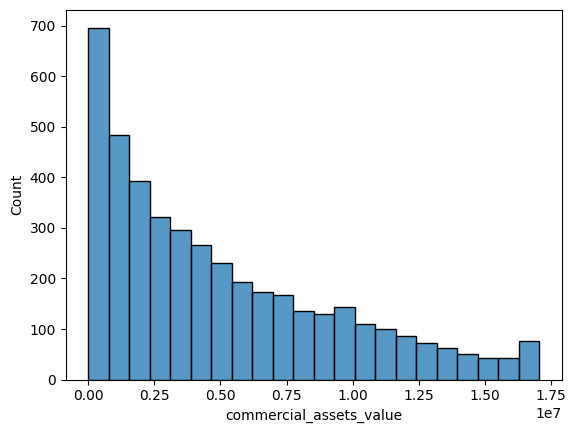

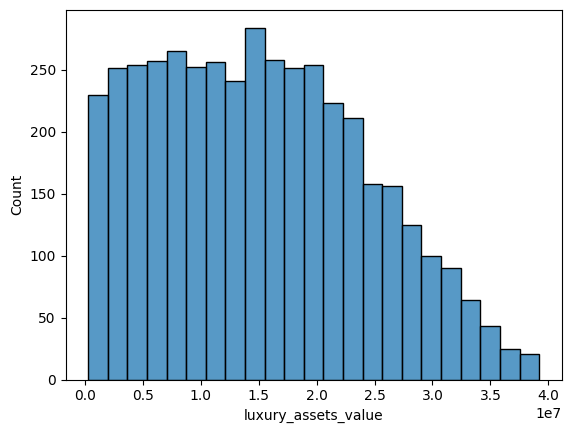

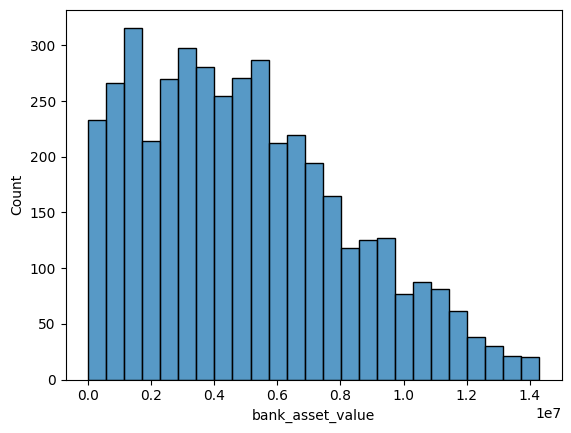

In [36]:
# histogram to understand data distribution
for i in df.select_dtypes(include= "number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

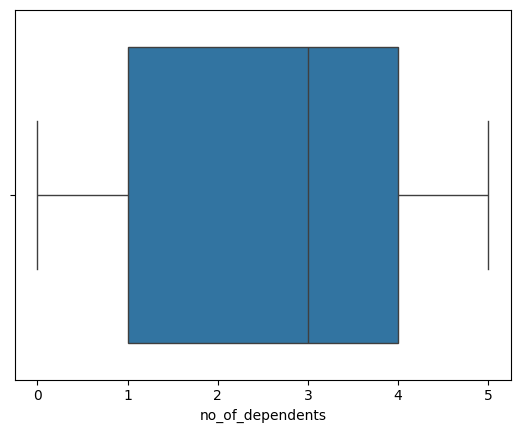

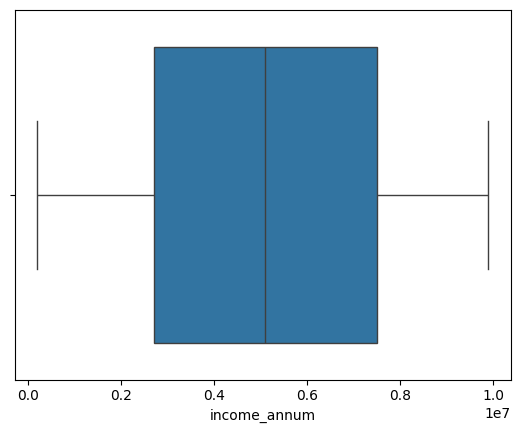

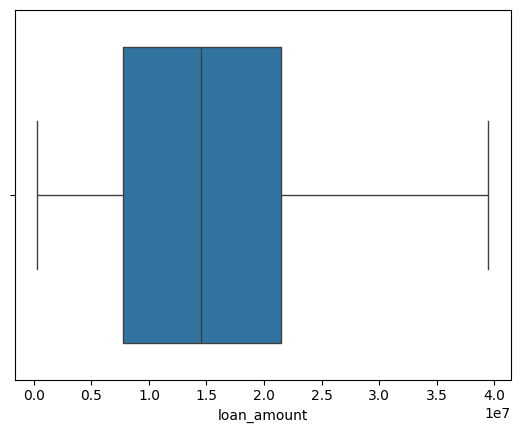

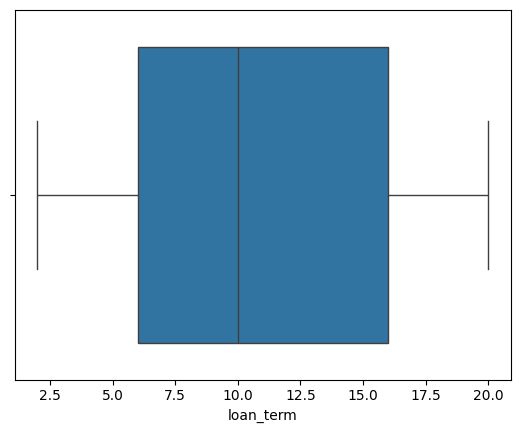

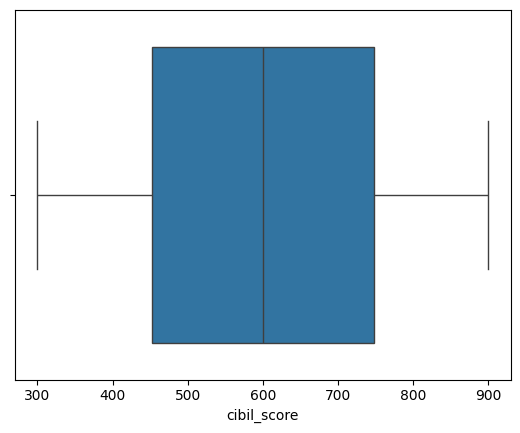

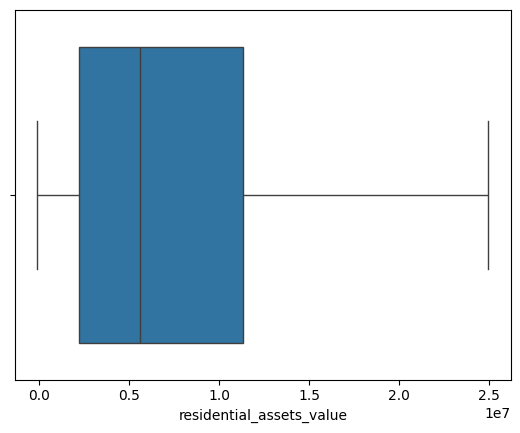

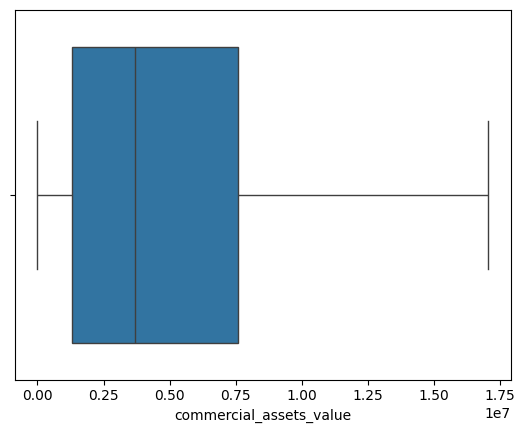

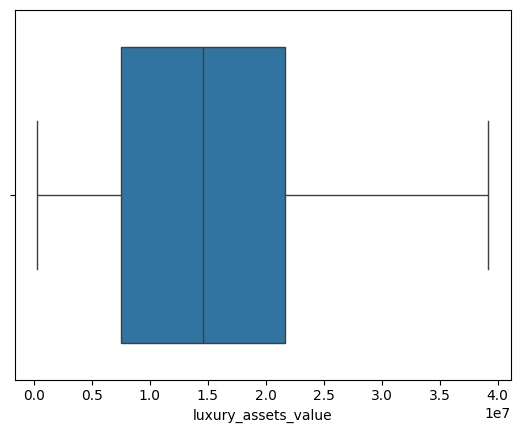

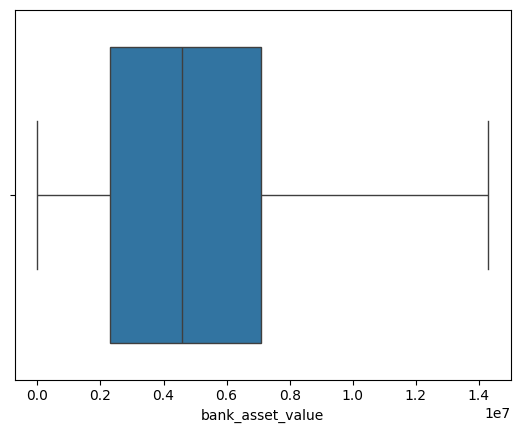

In [37]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [38]:
#scatter plot to understand the relationship
numeric_columns = df.select_dtypes(include = "number").columns
print(numeric_columns)
print(df.shape)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
(4269, 12)


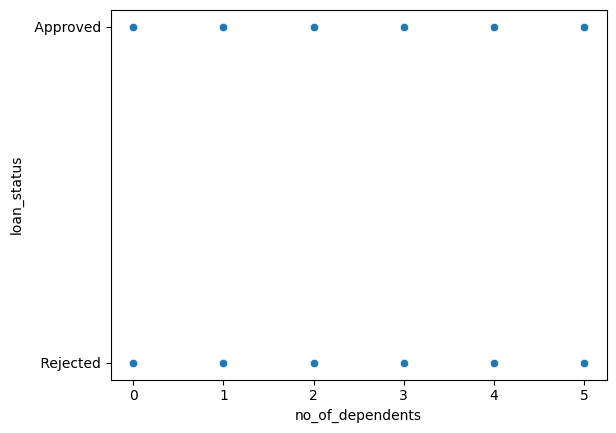

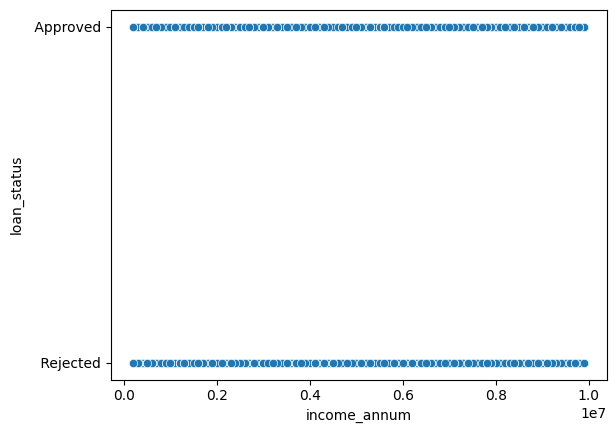

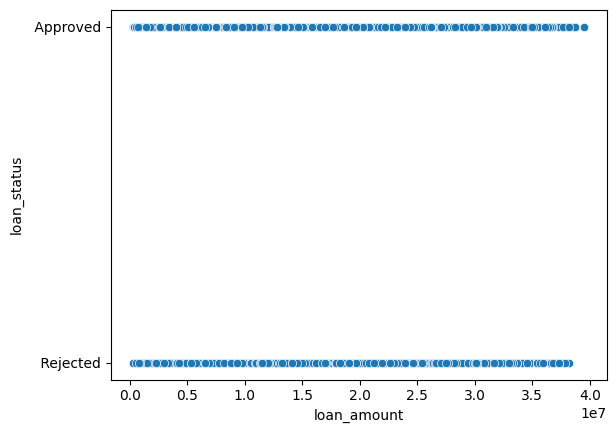

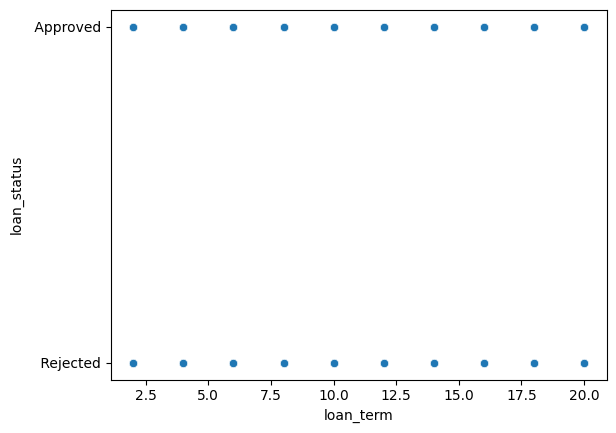

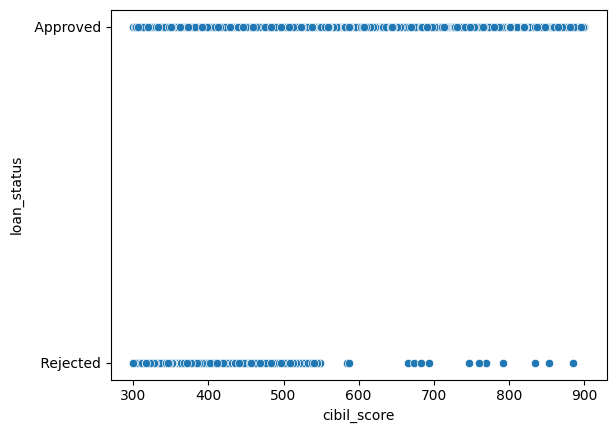

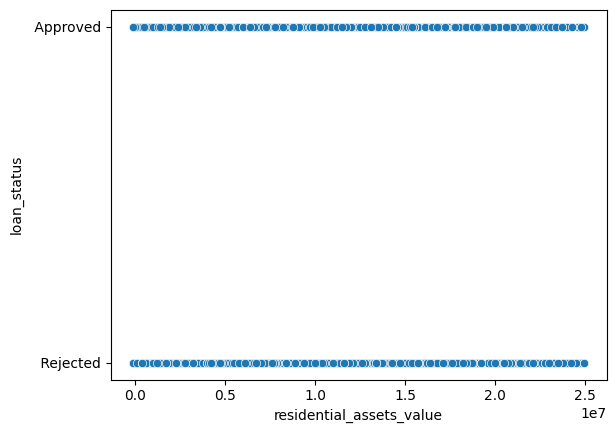

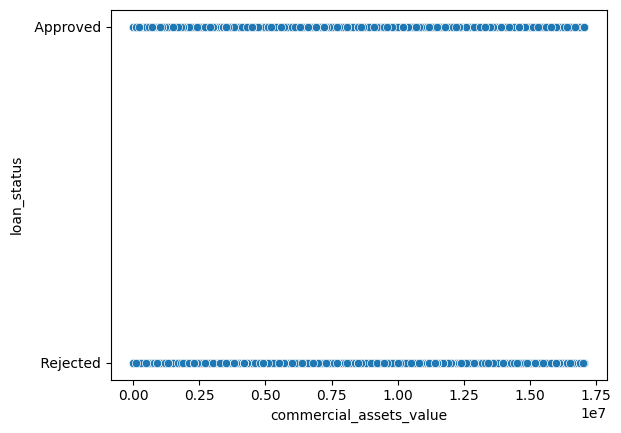

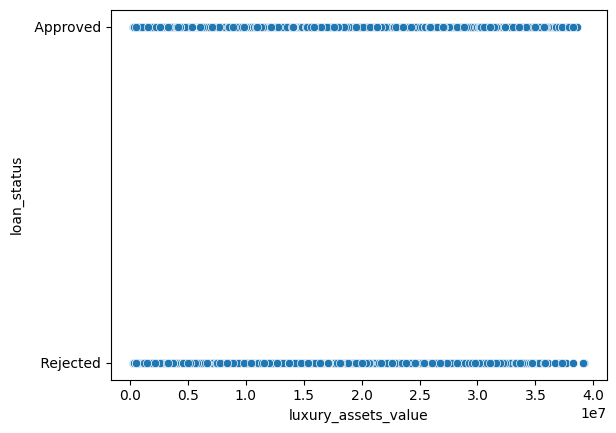

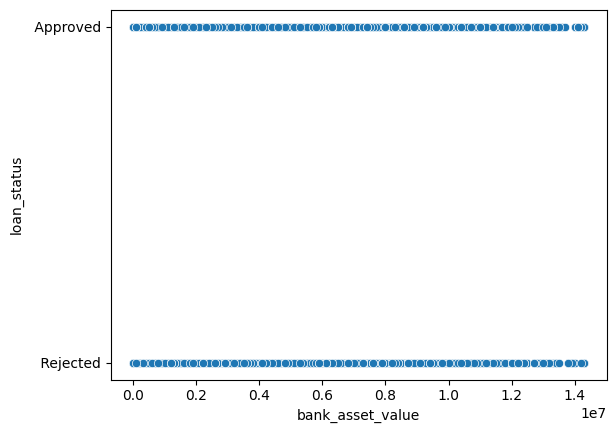

In [39]:
for i in numeric_columns:
    sns.scatterplot(data=df, x =i,y = 'loan_status' )
    plt.show()

In [40]:
s = df.select_dtypes(include ="number").corr()
s

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007111,-0.001598,0.002817,0.011126
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.637557,0.640824,0.929145,0.851177
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.595807,0.603251,0.860914,0.788207
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.007592,-0.005598,0.012490,0.017117
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.020578,-0.003203,-0.028618,-0.015414
residential_assets_value,0.007111,0.637557,0.595807,0.007592,-0.020578,1.000000,0.415983,0.592013,0.528202
commercial_assets_value,-0.001598,0.640824,0.603251,-0.005598,-0.003203,0.415983,1.000000,0.591943,0.548791
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.592013,0.591943,1.000000,0.788561
bank_asset_value,0.011126,0.851177,0.788207,0.017117,-0.015414,0.528202,0.548791,0.788561,1.000000


<Axes: >

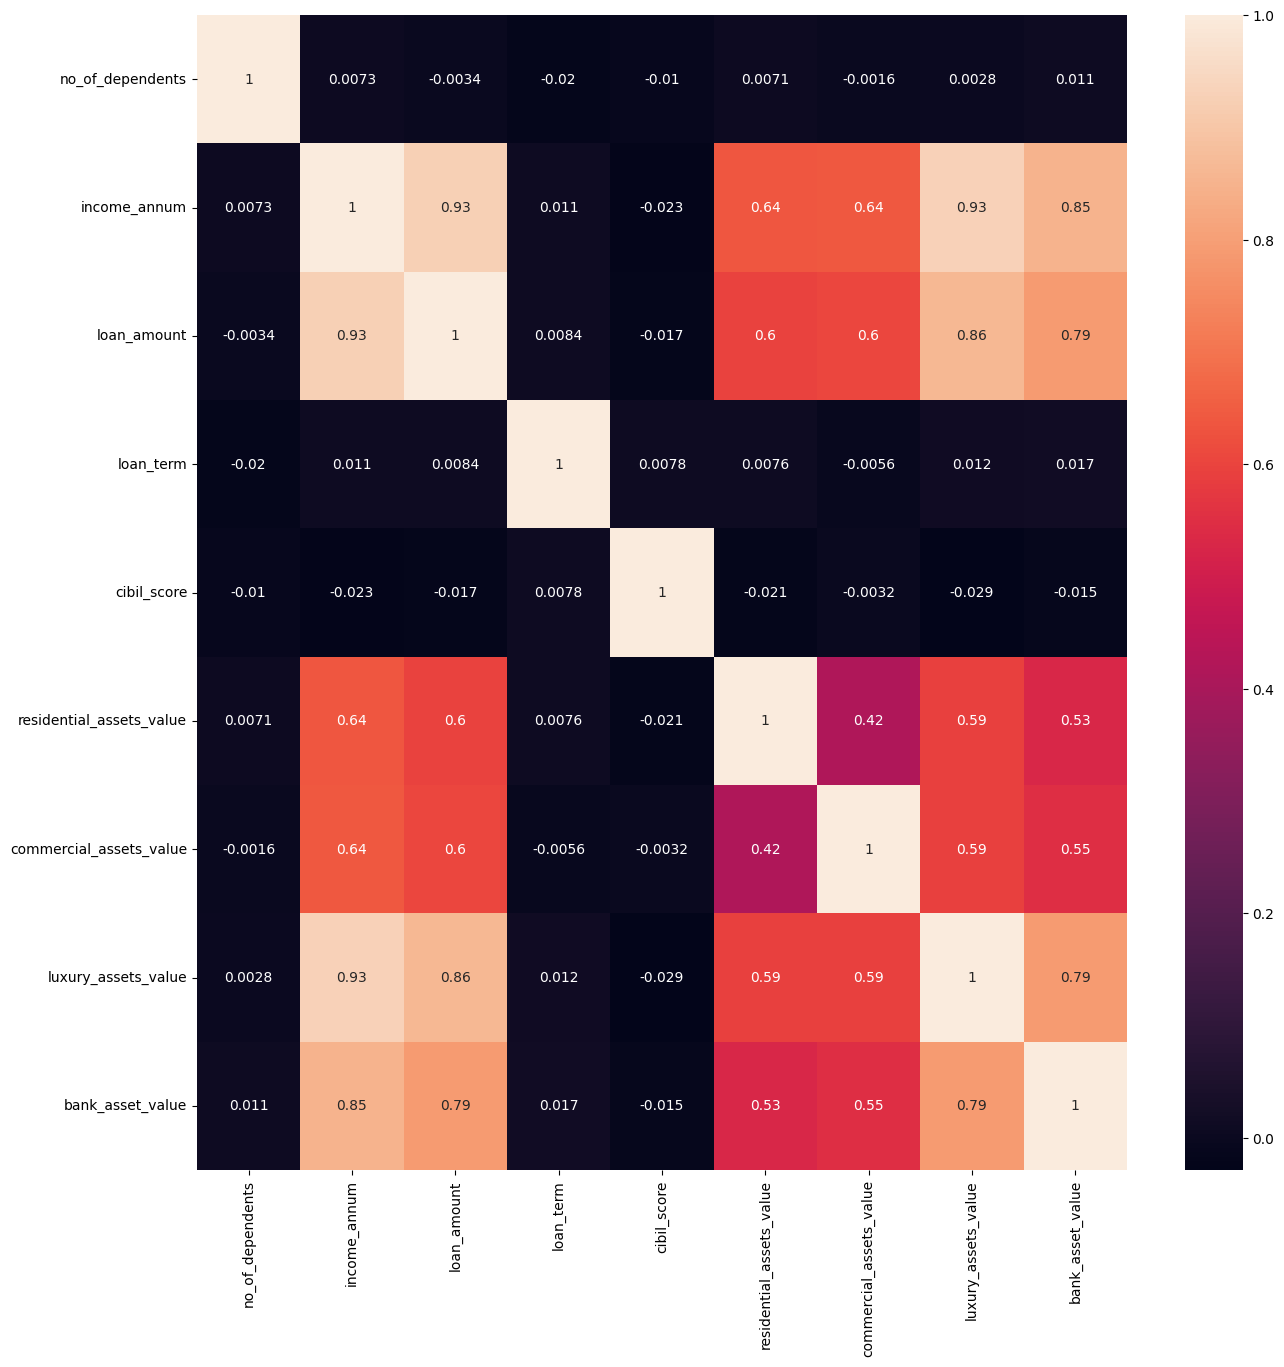

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot = True)

In [42]:
# Encode labels numerically (NaN will be assigned -1)
le = LabelEncoder()

df['loan_status'] = le.fit_transform(df['loan_status'])
df['loan_status'] = df['loan_status'].fillna('Unknown')
df['loan_status'] = le.fit_transform(df['loan_status'])
df['education'] = df['education'].fillna('Unknown') 
df['education'] = le.fit_transform(df['education'])
df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17050000.0,22700000.0,8000000.0,0
1,0,1,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3,0,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,3,0,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5,1,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1


In [43]:
# Fill missing categorical with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical with mean
for col in df.select_dtypes(exclude='object').drop('loan_status', axis=1).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [45]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17050000.0,22700000.0,8000000.0,0
1,0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,3,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1


In [46]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)




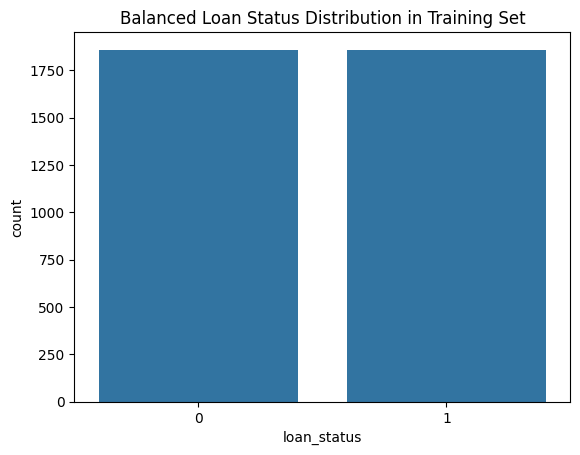

In [50]:
# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
#visualize the balance of the training set
sns.countplot(x=y_train_bal)
plt.title("Balanced Loan Status Distribution in Training Set")
plt.show()
# Define classifiers            
        

In [51]:
#initializing the models that we're going to use
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5),
    'SVC': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}


Model: KNN
Training Accuracy: 0.9454
Testing Accuracy: 0.8852
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       797
           1       0.82      0.90      0.86       484

    accuracy                           0.89      1281
   macro avg       0.88      0.89      0.88      1281
weighted avg       0.89      0.89      0.89      1281

Confusion Matrix (Test):
[[700  97]
 [ 50 434]]

Model: Logistic Regression
Training Accuracy: 0.9223
Testing Accuracy: 0.9297
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       797
           1       0.89      0.93      0.91       484

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281

Confusion Matrix (Test):
[[743  54]
 [ 36 448]]

Model: Decision Tree
Training Accuracy: 0.9847


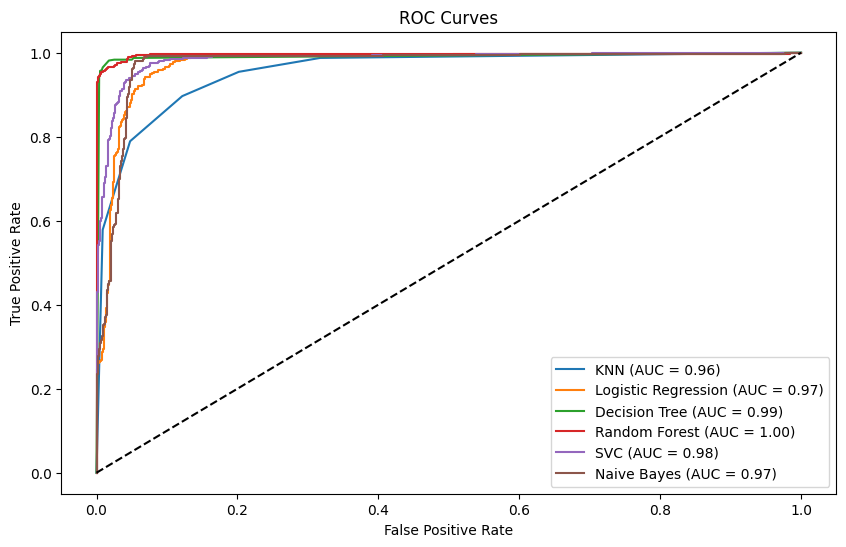

In [52]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Train on balanced data
    model.fit(X_train_bal, y_train_bal)
    # Predict on original test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    train_accuracy = model.score(X_train_bal, y_train_bal)
    test_accuracy = model.score(X_test, y_test)

    print(f"\nModel: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("Classification Report (Test):")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [53]:
#valuating the models using cross validation for accuracy and generalization
print("5-Fold Cross-Validation Accuracy Scores:")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: {scores.mean():.4f}")


5-Fold Cross-Validation Accuracy Scores:
KNN: 0.8962
Logistic Regression: 0.9171
Decision Tree: 0.9733
Random Forest: 0.9707
SVC: 0.9386
Naive Bayes: 0.9328


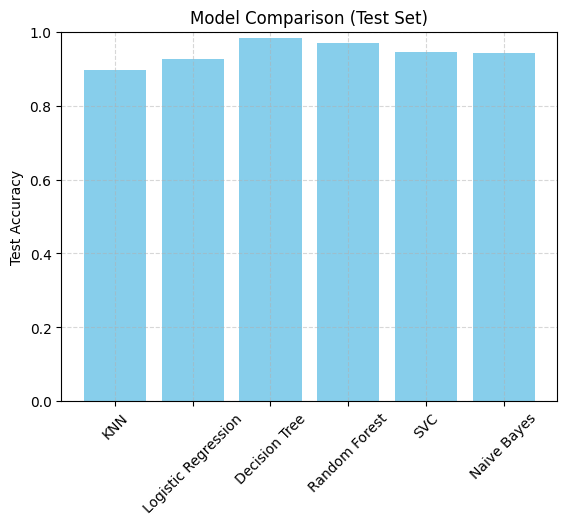

In [170]:
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_scores[name] = score

plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
plt.ylabel("Test Accuracy")
plt.title("Model Comparison (Test Set)")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()